## [심리 성향] 연령 t-test

|변수|설명|
|-----|----|
|index|번호|
|Q_A (a~t)|비식별화를 위해 일부 질문은 Secret 처리(1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.)|
|Q_E (a~t)| 해당 문항에 답하는 시간|
|Qa|Secret|
|Qb|The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.(대부분의 범죄자와 다른 사람들의 가장 큰 차이점은 범죄자들이 잡힐 만큼 어리석다는 것입니다.)|
|Qc|Anyone who completely trusts anyone else is asking for trouble.(다른 사람을 완전히 신뢰하는 사람은 문제를 요구하는 것입니다.)|
|Qd|Secret|
|Qe|P.T. Barnum was wrong when he said that there's a sucker born every minute.(PT Barnum은 매분마다 태어난다고 말한 것은 틀렸습니다.)|
|Qf|There is no excuse for lying to someone else.(남에게 거짓말을 하는 것은 변명의 여지가 없다)|
|Qg|Secret|
|Qh|Most people forget more easily the death of their parents than the loss of their property.(대부분의 사람들은 재산을 잃는 것보다 부모의 죽음을 더 쉽게 잊는다)|
|Qi|Secret|
|Qj|It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.(모든 사람에게 악의가 있고 기회가 있을 때 나타날 것이라고 가정하는 것이 가장 안전합니다.)|
|Qk|All in all, it is better to be humble and honest than to be important and dishonest.(대체로 중요하고 부정직한 것보다 겸손하고 부정직한 것이 더 낫습니다.)|
|Ql|Secret|
|Qm|It is hard to get ahead without cutting corners here and there.(여기 저기 모퉁이를 자르지 않고는 앞서가기 어렵다)|
|Qn|Secret|
|Qo|The best way to handle people is to tell them what they want to hear.(사람들을 다루는 가장 좋은 방법은 그들이 듣고 싶은 말을 하는 것이다)|
|Qp|Secret|
|Qq|Most people are basically good and kind.(대부분의 사람들은 기본적으로 착하고 친절합니다.)|
|Qr|One should take action only when sure it is morally right.(One should take action only when sure it is morally right.)|
|Qs|It is wise to flatter important people.(중요한 사람에게 아첨하는 것이 현명합니다.)|
|Qt|Secret|
|age_group|연령|
|education|교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)|
|engnat|모국어가 영어 (1=Yes, 2=No, 0=무응답)|
|familysize|형제자매 수|
|gender|성별 (Male, Female)|
|hand|필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)|
|married|혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)|
|race|인종 (Asian, Arab, Black, Indigenous Australian, Native American, White, Other)|
|religion|종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other)|
|tp__(01~07)|items were rated "I see myself as:" _____ such that( 나는 나를 이렇게 생각한다)|
|tp01|Extraverted, enthusiastic.(외향적, 열정적)|
|tp02|Critical, quarrelsome.(크리티컬, 다툼)|
|tp03|Dependable, self-disciplined.(신뢰할 수 있는, 자제력 있는)|
|tp04|Anxious, easily upset.(불안하고 화를 쉽게 낸다)|
|tp05|Open to new experiences, complex.(오픈 마인드, 복잡함)|
|tp06|Reserved, quiet.(예약된, 조용한)|
|tp07|Sympathetic, warm.(동정심, 따뜻함)|
|tp08|Disorganized, careless.(무질서하고 부주의한)|
|tp09|Calm, emotionally stable.(차분하고 정서적으로 안정된)|
|tp10|Conventional, uncreative.(기존의, 창의적이지 않은)|
|urban|유년기의 거주 구역(1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)|
|wr_(01~13)|실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)|
|wf_(01~03)|허구인 단어의 정의를 앎 (1=Yes, 0=No)|
|voted (타겟)|지난 해 국가 선거 투표 여부 (1=Yes, 2=No)|

###지금 하는 변수들에 t-test를 적용해도 되는가?

범주형 자료가 많아서 일반 t-test 불가
독립변수, 종속 변수 모두 범주형이라 x2 분석 (카이제곱), 로짓 분석 가능

카이제곱검정으로 연령과 투표의 연관성이 크게 나타남 (통계량이 크다, p-value가 작다)


In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='New Gulim')

In [3]:
train = pd.read_csv('train.csv')
test = pd. read_csv('test_x.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


## 변수 특성

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [5]:
#범주형 변수로 변환
train.iloc[:, 42:44] = train.iloc[:, 42:44].astype('object')
train.iloc[:, 46:48] = train.iloc[:, 46:48].astype('object')
train.iloc[:, 60] = train.iloc[:, 60].astype('object')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [6]:
group_age = train.groupby(['age_group'], as_index = False).count()
group_age['voted']

0      235
1    14215
2    14112
3     7836
4     5051
5     2889
6     1194
Name: voted, dtype: int64

In [7]:
group_age

,age_group,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,+70s,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235
1,10s,14215,14215,14215,14215,14215,14215,14215,14215,14215,...,14215,14215,14215,14215,14215,14215,14215,14215,14215,14215
2,20s,14112,14112,14112,14112,14112,14112,14112,14112,14112,...,14112,14112,14112,14112,14112,14112,14112,14112,14112,14112
3,30s,7836,7836,7836,7836,7836,7836,7836,7836,7836,...,7836,7836,7836,7836,7836,7836,7836,7836,7836,7836
4,40s,5051,5051,5051,5051,5051,5051,5051,5051,5051,...,5051,5051,5051,5051,5051,5051,5051,5051,5051,5051
5,50s,2889,2889,2889,2889,2889,2889,2889,2889,2889,...,2889,2889,2889,2889,2889,2889,2889,2889,2889,2889
6,60s,1194,1194,1194,1194,1194,1194,1194,1194,1194,...,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194


In [8]:
train.groupby(['age_group']).mean()['voted']

age_group
+70s    1.263830
10s     1.837214
20s     1.469671
30s     1.411179
40s     1.357949
50s     1.329872
60s     1.271357
Name: voted, dtype: float64

## 연령대 별 투표 비율

단순 카운트로는 투표율을 측정하기 애매하다

연령대 별 투표 비율을 통해 투표의 유무를 보자

In [9]:
a_10 = train[train['age_group'] == '10s']
av_10 = a_10[a_10['voted'] == 1]
print(av_10)
#투표율   0.1627857896588111
len(av_10)/14215

a_20 = train[train['age_group'] == '20s']
av_20 = a_20[a_20['voted'] == 1]
av_20
#투표율   0.530328798185941
len(av_20)/14112

a_30 = train[train['age_group'] == '30s']
av_30 = a_30[a_30['voted'] == 1]
av_30
#투표율   0.5888208269525268
len(av_30)/7836

a_40 = train[train['age_group'] == '40s']
av_40 = a_40[a_40['voted'] == 1]
av_40
#투표율   0.6420510789942586
len(av_40)/5051

a_50 = train[train['age_group'] == '50s']
av_50 = a_50[a_50['voted'] == 1]
av_50
#투표율   0.6701280719972309
len(av_50)/2889

a_60 = train[train['age_group'] == '60s']
av_60 = a_60[a_60['voted'] == 1]
av_60
#투표율   0.7286432160804021
len(av_60)/1194

a_70 = train[train['age_group'] == '+70s']
av_70 = a_70[a_70['voted'] == 1]
av_70
#투표율   0.7361702127659574
len(av_70)/235

       index  QaA   QaE  QbA    QbE  QcA    QcE  QdA   QdE  QeA  ...  wr_04  \
11        11  3.0  1086  2.0   3020  5.0   1997  1.0  1358  1.0  ...      1   
31        31  4.0  2340  1.0  18350  3.0  31865  1.0  4024  5.0  ...      1   
82        82  4.0   892  1.0   1314  2.0   2664  2.0   926  1.0  ...      1   
85        85  2.0  1149  4.0   3205  5.0   1214  1.0  1029  5.0  ...      1   
126      126  1.0   373  1.0    778  5.0    585  1.0   695  3.0  ...      0   
...      ...  ...   ...  ...    ...  ...    ...  ...   ...  ...  ...    ...   
45493  45493  3.0   125  4.0   1842  4.0    770  2.0  2667  3.0  ...      0   
45506  45506  1.0   511  5.0    705  5.0   1141  1.0   906  3.0  ...      1   
45507  45507  1.0   385  2.0   1154  3.0   1271  2.0   733  2.0  ...      1   
45515  45515  1.0   720  2.0   3028  5.0    495  1.0   559  1.0  ...      1   
45529  45529  4.0   593  1.0    857  1.0   1047  4.0  1515  5.0  ...      1   

       wr_05  wr_06  wr_07  wr_08  wr_09  wr_10  wr

0.7361702127659574

In [10]:
voting = [len(av_10)/14215,len(av_20)/14112,len(av_30)/7836,len(av_40)/5051,len(av_50)/2889,len(av_60)/1194,len(av_70)/235]
voting

[0.1627857896588111,
 0.530328798185941,
 0.5888208269525268,
 0.6420510789942586,
 0.6701280719972309,
 0.7286432160804021,
 0.7361702127659574]

Text(0.5, 1.0, '연령대 별 투표 비율')

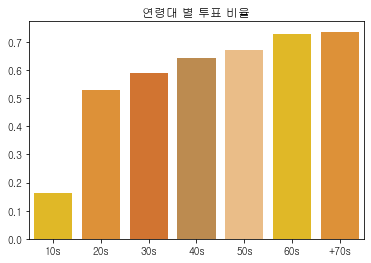

In [11]:
colors=['#FFCA08','#F8931D','#EC7016','#CE8D3E','#FBBE77']
age = ['10s','20s','30s','40s','50s','60s','+70s']
sns.barplot(x=age, y =voting, palette = colors)
plt.title('연령대 별 투표 비율')

In [5]:
import pandas as pd
from scipy.stats import chi2_contingency

vote_crosstab=pd.crosstab(train['age_group'], train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 7475.454986387315
2. p-value: 0.0
3. df: 6


10대의 인원이 가장 많은데 투표율이 가장 적다. 이유는?

60대와 70대의 인원은 약 5배 차이
실제 투표율은 크게 차이가 나지 않는다

20대와 30대는 인원 차이가 크지만 투표율은 거의 차이나지 않는다

-> 연령별 인원수는 투표율에 영향을 미치지 않는다
-> 연령에 관계없이 투표율은 같다

가설 설정
H0 : 60대의 투표율과 70대의 투표율은 같다
H1 : 60대의 투표율과 70대의 투표율은 같지 않다

-> 귀무가설 기각, 대립가설 채택
-> H1 : 60대의 투표율과 70대의 투표율은 같지 않다



In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

vote_crosstab=pd.crosstab(train['age_group']=='10s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 7032.865540036868
2. p-value: 0.0
3. df: 1


In [41]:
av_20.iloc[:, 61] = av_20.iloc[:, 61].astype('object')
av_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 3 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       7484 non-null   int64  
 1   QaA         7484 non-null   float64
 2   QaE         7484 non-null   int64  
 3   QbA         7484 non-null   float64
 4   QbE         7484 non-null   int64  
 5   QcA         7484 non-null   float64
 6   QcE         7484 non-null   int64  
 7   QdA         7484 non-null   float64
 8   QdE         7484 non-null   int64  
 9   QeA         7484 non-null   float64
 10  QeE         7484 non-null   int64  
 11  QfA         7484 non-null   float64
 12  QfE         7484 non-null   int64  
 13  QgA         7484 non-null   float64
 14  QgE         7484 non-null   int64  
 15  QhA         7484 non-null   float64
 16  QhE         7484 non-null   int64  
 17  QiA         7484 non-null   float64
 18  QiE         7484 non-null   int64  
 19  QjA         7484 non-null 

C:\Users\juyeo\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#정규성 검정
지금과 같이 범주형 변수인 경우에는 정규성 검정이 없습니다.
교차분석(Chi-square test)로 분석하면 됩니다. 

#등분산 검정
범주형 - 범주형의 등분산 검정 방법이 없다 (안나옴)

Text(0.5, 1.0, '연령대 별 투표 비율/전체')

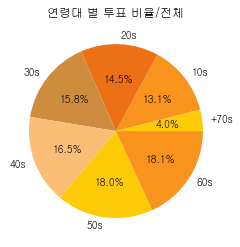

In [13]:
#연령대 투표 비율이 전체 데이터에 미치는 영향 정도?

colors=['#FFCA08','#F8931D','#EC7016','#CE8D3E','#FBBE77']
plt.pie(voting, labels=group_age['age_group'],autopct='%.1f%%', colors=colors)
plt.title('연령대 별 투표 비율/전체')

#10대, 20대가 가장 많고 60,70대가 가장 비율이 낮다

In [7]:
train['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

Text(0.5, 1.0, '전체 투표율')

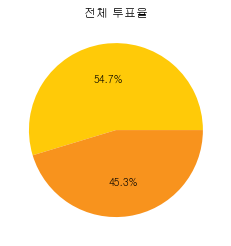

In [12]:
colors=['#FFCA08','#F8931D','#EC7016','#CE8D3E','#FBBE77']
plt.pie(train['voted'].value_counts(),autopct='%.1f%%', colors=colors)
plt.title('전체 투표율')